In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
def calculate(start_amount, roi, years, reinvest_amount):
    year = [x for x in range(years*12+1)]
    inv = [start_amount]
    temp = start_amount
    for x in range(years*12):
        temp += reinvest_amount
        inv.append(temp)
        
    sv = [start_amount]
    temp = start_amount
    for y in range(len(inv)-1):
        temp += sv[y]*roi + reinvest_amount
        sv.append(round(temp,2))
        
    ad = [round(sv*roi*12, 2) for sv in sv]
    m = [round(ad/12, 2) for ad in ad]
    df = pd.DataFrame(data={"month":year, "invested":inv, "stock value":sv, 
                            "monthly returns":m})
    return df

In [180]:
def viz(df):
    plt.figure(figsize=(8, 6))
    plt.style.use(["dark_background"])
    plt.plot(df["year"], df["stock value"], marker="o")
    plt.plot(df["year"], df["annual returns"], marker="o")
    plt.xticks(df["year"])
    plt.yticks([df.iloc[len(df)-1, 2]/10*x for x in range(len(df))])
    plt.grid(axis="y")
    plt.legend(["stock value", "annual returns"])

In [2]:
def cagr(initial, end, time):
    return ((end/initial)**(1/time))-1

In [5]:
cagr(75, 683, 5)

0.5555067070992215

In [8]:
df = calculate(450, .02, 25, 200)
df.tail(10)

,month,invested,stock value,monthly returns
291,291,58650,3314805.69,66296.11
292,292,58850,3381301.80,67626.04
293,293,59050,3449127.84,68982.56
294,294,59250,3518310.39,70366.21
295,295,59450,3588876.60,71777.53
296,296,59650,3660854.13,73217.08
297,297,59850,3734271.22,74685.42
298,298,60050,3809156.64,76183.13
299,299,60250,3885539.77,77710.79
300,300,60450,3963450.57,79269.01


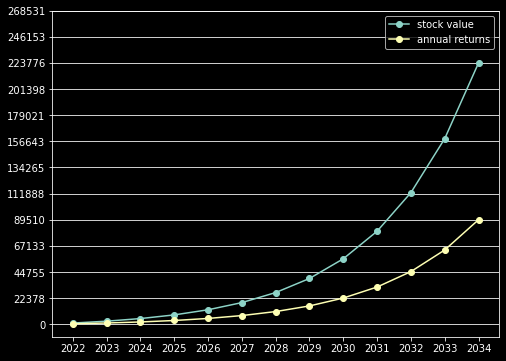

In [214]:
viz(df)